<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Examining-data-from-a-file" data-toc-modified-id="Examining-data-from-a-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Examining data from a file</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Redefining-data-types" data-toc-modified-id="Redefining-data-types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Redefining data types</a></span></li><li><span><a href="#Correcting-data-errors" data-toc-modified-id="Correcting-data-errors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correcting data errors</a></span></li><li><span><a href="#Counting-indicators-by-user" data-toc-modified-id="Counting-indicators-by-user-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Counting indicators by user</a></span></li></ul></li><li><span><a href="#Analysis-of-customer-consumption-behaviour-by-tariff-package" data-toc-modified-id="Analysis-of-customer-consumption-behaviour-by-tariff-package-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis of customer consumption behaviour by tariff package</a></span><ul class="toc-item"><li><span><a href="#Duration-of-calls-analysis" data-toc-modified-id="Duration-of-calls-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Duration of calls analysis</a></span></li><li><span><a href="#Number-of-messages-analysis" data-toc-modified-id="Number-of-messages-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Number of messages analysis</a></span></li><li><span><a href="#Internet-trafic-analysis" data-toc-modified-id="Internet-trafic-analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Internet trafic analysis</a></span></li><li><span><a href="#Revenue-analysis" data-toc-modified-id="Revenue-analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Revenue analysis</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Users'-average-revenue-of-Ultra-and-Smart-tariff-differ" data-toc-modified-id="Users'-average-revenue-of-Ultra-and-Smart-tariff-differ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Users' average revenue of Ultra and Smart tariff differ</a></span></li><li><span><a href="#The-average-revenue-of-users-from-Moscow-differs-from-users-from-other-regions" data-toc-modified-id="The-average-revenue-of-users-from-Moscow-differs-from-users-from-other-regions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The average revenue of users from Moscow differs from users from other regions</a></span></li></ul></li><li><span><a href="#Overall-conclusion" data-toc-modified-id="Overall-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overall conclusion</a></span></li></ul></div>

# Determining a prospective tariff for a telecom company

We are analysts at Megaline, a federal cellular operator. Customers are offered two tariff plans: Smart and Ultra. In order to adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.

We have to do a preliminary analysis of the tariffs on a small sample of customers. We have data from 500 Megaline users at our disposal: who they are, where they come from, what tariff they use, how many calls and messages each sent in 2018. We need to analyse customer behaviour and draw a conclusion - which tariff is better.

**Tariffs description**.

**Tariff "Smart"**.
1. Monthly fee: 550 rubles
2. Includes 500 minutes talk time, 50 messages and 15GB of Internet traffic
3. Fee for services beyond the tariff package:
    - one minute of talk time: 3 RUB
    - message: 3 rubles
    - 1 Mb of Internet traffic: 200 RUB

**Tariff "Ultra"**.
1. Monthly fee: 1950 roubles
2. 3000 minutes of talk time, 1000 messages and 30 GB of Internet traffic included
3. Fee for services beyond the tariff package:
    - one minute of talk time: 1 RUB
    - message: 1 RUB
    - 1 Gb of Internet traffic: 150 RUB

## Examining data from a file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from datetime import datetime
import warnings


In [2]:

try:
    users = pd.read_csv('data/users.csv')
    calls = pd.read_csv('data/calls.csv')
    messages = pd.read_csv('data/messages.csv')
    internet = pd.read_csv('data/internet.csv')
    tariffs = pd.read_csv('data/tariffs.csv')

except:
    calls = pd.read_csv('/datasets/calls.csv', sep = ',')
    internet = pd.read_csv('/datasets/internet.csv', sep = ',')
    messages = pd.read_csv('/datasets/messages.csv', sep = ',')
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep = ',')
    users = pd.read_csv('/datasets/users.csv', sep = ',')

warnings.simplefilter(action='ignore', category=FutureWarning)

<u>**Customer info table**<u/>

In [3]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
53,1053,64,NaN,Ростов-на-Дону,Ренальд,Фёдоров,2018-09-30,ultra
365,1365,38,NaN,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
179,1179,43,NaN,Вологда,Дана,Астапенко,2018-04-19,smart
339,1339,52,NaN,Москва,Григорий,Вишневский,2018-08-14,smart
294,1294,66,NaN,Владивосток,Дебора,Асафьева,2018-02-20,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.duplicated().sum()

0

- there are 500 entries in the table
- column names are correctly represented, taking into account "snake_case" 
- 38 populated values in the `churn_date` column. Missing values are not a problem in this case - this is evidence of a valid contract at the time of data uploading
- The columns with dates should be converted to the appropriate data type. Also convert the `user_id` column to a string data type. Despite the fact that it contains integer values, the logic of this parameter does not involve arithmetic and other calculations with this column, respectively, replace its data type with `str`.  
- other than that, no problems are observed with the data
- no duplicates

<u>**Calls infor table**<u/>

In [6]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
calls.duplicated().sum()

0

- there are 202607 records in the table
- column names are correct, in snake_case 
- there are no missing values
- the column with dates should be converted to an appropriate data type. Also convert the `user_id` column to a string data type. Despite the fact that it contains integer values, the logic of the parameter does not provide for arithmetic and other calculations with this column, respectively, replace its data type with `str`.
- there are zero values in the column with the duration of the call - these are missed calls, according to the condition of the project. The duration of the calls will also need to be rounded "up", according to the conditions of the operator.
- other than that, there is no problem with the data
- no duplicates

<u>**Messages info table**<u/>

In [9]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.duplicated().sum()

0

- there are 123036 records in the table
- column names are correct, in snake_case 
- no missing values
- the column with dates should be converted to an appropriate data type. Also convert the `user_id` column to a string data type. Despite the fact that it contains integer values, the logic of the parameter does not provide for arithmetic and other calculations with this column, respectively, replace its data type with `str`.
- other than that, no problems are observed with the data
- no duplicates

<u>**Internet sessions info table**<u/>

In [12]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
internet.duplicated().sum()

0

- there are 149396 records in the table
- column names are correct, in snake_case
- there are no missing values
- there is one uninformative column `Unnamed: 0` which will need to be removed
- the column with dates should be converted to the appropriate data type. Also convert the `user_id` column to a string data type. Despite the fact that it contains integer values, the logic of the parameter does not provide for arithmetic and other calculations with this column, respectively, replace its data type with `str`.
- other than that, no problems are observed with the data
- no duplicates

<u>**Tariffs info table**<u/>

In [15]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


- A dictionary table of two rows. There is nothing wrong with the data presented.

**Conclusion:**

There are five files with tables in the project:

1. users - information about users
2. calls - information about calls
3. messages - information about messages
4. internet - information about internet sessions
5. tariffs - information about tariffs

- Each table has certain columns, which data type should be redefined. 

- The `users` table has missing values in the `churn_date` column, but this is not an error, it is an indicator of a contract in force at the time of data upload.

- The table `internet` has an uninformative column `Unnamed: 0`, which should be removed.

- There are no explicit duplicates in all tables.

**<u>The overall view of the data is very positive - everything is neat and without major problems.<u/>**

## Data preparation

### Redefining data types

In each of the tables, redefine the data type of the columns to the type we expect based on the business logic of the data presented in the column.

In [17]:
# table users
users['user_id'] = users['user_id'].astype(str)
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# table calls
calls['user_id'] = calls['user_id'].astype(str)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# table messages
messages['user_id'] = messages['user_id'].astype(str)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# table internet
internet['user_id'] = internet['user_id'].astype(str)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Correcting data errors

Will analyse the data in all the tables one by one for data adequacy, outliers or anomalous values.

**table `users`**

In [18]:
users.describe(include='all')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500,500.00000,38,500,500,500,500,500
unique,500,NaN,33,76,246,419,270,2
top,1069,NaN,2018-10-03 00:00:00,Москва,Радим,Андреенко,2018-05-28 00:00:00,smart
freq,1,NaN,2,99,6,5,8,351
first,NaN,NaN,2018-08-17 00:00:00,NaN,NaN,NaN,2018-01-01 00:00:00,NaN
last,NaN,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,2018-12-31 00:00:00,NaN
mean,NaN,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,32.00000,NaN,NaN,NaN,NaN,NaN,NaN


In the `users` table, everything looks quite realistic. The age distribution is quite adequate: both the minimum and maximum ages are within the expected values. The number of missing values in `churn_date` indicates a valid contract and is not an error. There are 76 cities in the database, with Moscow being the most common, which is also expected. 
There are no corrections in this table.

**table `calls`**

In [19]:
calls.describe(include='all')

,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607
unique,202607,365,NaN,492
top,1496_486,2018-12-31 00:00:00,NaN,1377
freq,1,1435,NaN,1760
first,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,6.755887,NaN
std,NaN,NaN,5.843365,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.300000,NaN


All `id` calls are unique, which is to be expected. The number of unique days is 365, respectively for each day of the year from 01.01.2018 to 31.12.2018 is also correct. The distribution of call duration is also expected. The average call is 6.75 minutes, the median is 6 minutes, and the maximum is 38 minutes. The presence of zero calls by duration also fits into the business logic, as these are, according to the operator's terms, recorded missed calls.

Column `id` will be renamed to `call_id`, for a more correct and unambiguous understanding of the information presented in it.

Duration of calls in this table is represented by float values. However, under the terms of tariffs, when calculating minutes, call duration values must be rounded upwards. For further investigation, will round up the values of the `duration` column. 

In [20]:
calls = calls.rename(columns={'id':'call_id'}) # renaming column id

calls.duration = np.ceil(calls.duration) # rounding the call duration values upwards

**table `messages`**

In [21]:
messages.describe(include='all')

,id,message_date,user_id
count,123036,123036,123036
unique,123036,364,426
top,1168_463,2018-12-31 00:00:00,1277
freq,1,859,1463
first,NaN,2018-01-02 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN


In the `messages` table, everything is also within the reasonable and expected limits. 

The `id` column will be renamed to `message_id`, for a more correct and unambiguous understanding of the information presented in it.

There are no other corrections to this table.

In [22]:
messages = messages.rename(columns={'id':'message_id'}) # renaming column id

**table `internet`**

In [23]:
internet.describe(include='all')

,Unnamed: 0,id,mb_used,session_date,user_id
count,149396.000000,149396,149396.000000,149396,149396
unique,NaN,149396,NaN,365,497
top,NaN,1114_40,NaN,2018-12-31 00:00:00,1496
freq,NaN,1,NaN,1057,834
first,NaN,NaN,NaN,2018-01-01 00:00:00,NaN
last,NaN,NaN,NaN,2018-12-31 00:00:00,NaN
mean,74697.500000,NaN,370.192426,NaN,NaN
std,43127.054745,NaN,278.300951,NaN,NaN
min,0.000000,NaN,0.000000,NaN,NaN
25%,37348.750000,NaN,138.187500,NaN,NaN


In the table `internet`, as in the previous table also all values are adequate and expected. 

The only thing is that the table contains an uninformative column: `Unnamed: 0`, which we will remove. And also column `id` will be renamed in `session_id`, for a more correct and unambiguous understanding of the information presented in it.

There are no other changes to the table.

In [24]:
internet = internet.rename(columns={'id':'session_id'}) # renaming column id

internet.drop('Unnamed: 0', axis=1, inplace=True) # removing uninformative column

### Counting indicators by user

###### - <u>calls made and minutes spent by month<u/>

To calculate the figures for the month, let's add the `month` column to the `calls` table, reflecting the number of the month in which the calls were made. 

In [25]:
calls['month'] = calls['call_date'].dt.month

In [26]:
calls

,call_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


Will create a grouping table showing the total number of calls made and their total duration during each month, per user.

In [28]:
user_calls = calls.groupby(['user_id', 'month'])\
.agg({'call_id':'count', 'duration':'sum'})\
.reset_index()\
.rename(columns={'call_id':'total_calls', 'duration':'total_duration'})

user_calls

,user_id,month,total_calls,total_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


###### - <u>number of messages sent by month<u/>

To calculate the figures for the month, will add the `month` column to the `messages` table, reflecting the number of the month in which the messages were sent. 

In [29]:
messages['month'] = messages['message_date'].dt.month

In [30]:
messages

,message_id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Will create a grouping table showing the total number of messages sent during each month, broken down by each user.

In [31]:
user_messages = messages.groupby(['user_id', 'month'])\
.agg({'message_id':'count'})\
.reset_index()\
.rename(columns={'message_id':'total_messages'})

user_messages

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


###### - <u>volume of internet traffic consumed by month<u/>

To calculate the figures for the month, will add the `internet` column to the `month` column, reflecting the number of the month in which Internet traffic was used.

In [32]:
internet['month'] = internet['session_date'].dt.month

In [33]:
internet

,session_id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


Will create a grouping table showing the total amount of internet traffic consumed during each month, broken down by each user.

In [34]:
user_internet = internet.groupby(['user_id', 'month'])\
.agg({'mb_used':'sum'})\
.reset_index()\
.rename(columns={'mb_used':'total_internet'})

user_internet.head()

,user_id,month,total_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Since under the terms of the mobile operator's contract, the amount of Internet traffic consumed during the month must be rounded upwards, it is necessary to bring the values in the `total_internet` column in line with the operator's terms of service. Also, Internet traffic consumption is calculated in Gigabytes, so will convert the values to Gigabytes and then round them up. 

In [35]:
user_internet.total_internet = np.ceil(user_internet.total_internet/1024)


user_internet

,user_id,month,total_internet
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


###### - <u>Calculation of monthly revenue per user<u/>

In order to calculate the revenue for each user, we need information about the talk time, the number of messages and the amount of internet traffic used per month. In addition, we need data about the customer's data plan. All these data are in different tables, which need to be merged into one table for further calculations. 

In [36]:
# Creating a consolidated table user_cons (consolidated), which
# combines the tables with the data needed for the calculations 

user_cons = user_calls.merge(user_messages, on=['user_id','month'], how='outer') # using the outer method so that all calls and all messages from the user are captured
user_cons = user_cons.merge(user_internet, on=['user_id','month'], how='outer') # using the outer method so that all calls and all messages as well as all internet trafic from the user are captured 
user_cons = user_cons.merge(users, on='user_id', how='left')
user_cons = user_cons.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')

user_cons.sample(5)

,user_id,month,total_calls,total_duration,total_messages,total_internet,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
985,1157,10,60.0,416.0,NaN,27.0,27,NaT,Москва,Виктория,...,2018-02-23,smart,50,15360,500,550,200,3,3,smart
371,1058,11,101.0,720.0,27.0,20.0,66,NaT,Вологда,Лукий,...,2018-10-07,smart,50,15360,500,550,200,3,3,smart
2912,1458,4,108.0,761.0,4.0,15.0,36,NaT,Барнаул,Роберт,...,2018-02-13,ultra,1000,30720,3000,1950,150,1,1,ultra
381,1059,12,92.0,726.0,21.0,19.0,47,NaT,Курск,Глеб,...,2018-04-14,smart,50,15360,500,550,200,3,3,smart
1164,1184,12,46.0,278.0,1.0,9.0,21,NaT,Барнаул,Снежана,...,2018-09-03,smart,50,15360,500,550,200,3,3,smart


After merging the tables, we will check that they have been merged correctly. To this end, we will check the correspondence of the checksums of some indicators before and after the merger of the tables. Let's calculate the total duration of calls, number of SMS and Internet traffic volume before and after merging the tables.

In [37]:
print('Длительность звонков до объединения таблиц: ', user_calls.total_duration.sum())
print('Длительность звонков после объединения таблиц: ', user_cons.total_duration.sum())
print()
print('Количество СМС до объединения таблиц: ', user_messages.total_messages.sum())
print('Количество СМС после объединения таблиц: ', user_cons.total_messages.sum())
print()
print('Объем трафика до объединения таблиц: ', user_internet.total_internet.sum())
print('Объем трафика после объединения таблиц: ', user_cons.total_internet.sum())

Длительность звонков до объединения таблиц:  1450301.0
Длительность звонков после объединения таблиц:  1450301.0

Количество СМС до объединения таблиц:  123036
Количество СМС после объединения таблиц:  123036.0

Объем трафика до объединения таблиц:  55599.0
Объем трафика после объединения таблиц:  55599.0


We see that the checksums of the sample indicators converge, thus confirming that the tables have been merged correctly. 

In [38]:
# Removing the tariff_name column, which is a duplicate of the tariff column. The duplicate column was created when merging the tables.

user_cons.drop('tariff_name', axis=1, inplace=True)

When merging the tables, missing values may have appeared in certain columns. Checking the table for missing values and fill them in if necessary.

In [39]:
user_cons.isna().sum()

user_id                     0
month                       0
total_calls                40
total_duration             40
total_messages            497
total_internet             11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

The missing values in columns `total_calls`, `total_duration`, `total_messages`, `total_internet` are quite logical and indicate that certain users may not have used one of the above services during the month: calls, messages or the Internet. Therefore, when merging tables, NaNs appeared in these cells. Accordingly, will replace them with zeros. We will not change anything in the `churn_date` column, as the missing values here indicate a valid subscription contract. 

In [40]:
user_cons.total_calls.fillna(0, inplace=True)
user_cons.total_duration.fillna(0, inplace=True)
user_cons.total_messages.fillna(0, inplace=True)
user_cons.total_internet.fillna(0, inplace=True)


In [41]:
user_cons.isna().sum()

user_id                     0
month                       0
total_calls                 0
total_duration              0
total_messages              0
total_internet              0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

By combining all the necessary tables, we can calculate the monthly revenue from each user. 

We will write a function that will calculate the operator's revenue from the customer's use of services (calls, messages and Internet traffic) in excess of the limit set by the relevant tariff package.  

In [42]:
def extra_package(row):
    
    """
    The function takes as input the actual values of the used minutes, messages and traffic as well as 
    the values of the same services included in the tariff package. Based on the difference between the actuals and the limit
    and the cost of the exceeded service, the total amount of the operator's revenue is calculated 
    for each customer for exceeding the services included in the tariff plan.    
    """
    
    try:
        
        min_fact = row['total_duration']
        sms_fact = row['total_messages']
        gb_fact = row['total_internet']
        min_pack = row['minutes_included']
        sms_pack = row['messages_included']
        gb_pack = row['mb_per_month_included']

        min = (min_fact - min_pack) * row['rub_per_minute']
        sms = (sms_fact - sms_pack) * row['rub_per_message']
        gb = (gb_fact - gb_pack/1024) * row['rub_per_gb']
    
        extra_package_revenue = 0
    
        for value in [min, sms, gb]:
            if value > 0:
                extra_package_revenue += value

        return extra_package_revenue
    
    except:
        return 'Input Value Error'

Will create an additional column in the table to show the average monthly revenue per customer for services consumed in excess of the tariff package and will fill the column with the results of our function call. 

In [43]:
# create a column with the revenue beyond the tariff package and fill it with the result of the function call

user_cons['extra_package_revenue'] = user_cons.apply(extra_package, axis=1)

Having calculated the revenue per customer for services consumed over and above the tariff package, we can calculate the total revenue, including the cost of the monthly subscription. Adding the total revenue to the additional column `total_revenue`.

In [44]:
user_cons.eval('total_revenue = extra_package_revenue + rub_monthly_fee', inplace=True)

In [45]:
user_cons.sample(10)

,user_id,month,total_calls,total_duration,total_messages,total_internet,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_package_revenue,total_revenue
533,1085,9,18.0,120.0,0.0,10.0,69,NaT,Омск,Лола,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2454,1389,10,51.0,329.0,3.0,19.0,29,NaT,Москва,Надежда,...,smart,50,15360,500,550,200,3,3,800.0,1350.0
1908,1304,11,61.0,435.0,65.0,35.0,68,NaT,Владимир,Илья,...,ultra,1000,30720,3000,1950,150,1,1,750.0,2700.0
725,1116,9,41.0,272.0,0.0,14.0,65,NaT,Петрозаводск,Альберта,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1032,1166,11,43.0,357.0,107.0,8.0,48,NaT,Нижний Новгород,Святослав,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2326,1373,10,5.0,23.0,55.0,19.0,34,NaT,Улан-Удэ,Нелли,...,smart,50,15360,500,550,200,3,3,815.0,1365.0
1968,1314,9,71.0,519.0,33.0,17.0,27,NaT,Киров,Максим,...,smart,50,15360,500,550,200,3,3,457.0,1007.0
1780,1284,12,71.0,472.0,39.0,16.0,62,NaT,Волгоград,Евфросинья,...,smart,50,15360,500,550,200,3,3,200.0,750.0
659,1105,9,6.0,26.0,5.0,1.0,51,NaT,Улан-Удэ,Рузана,...,smart,50,15360,500,550,200,3,3,0.0,550.0
2489,1393,12,85.0,651.0,59.0,17.0,56,NaT,Краснодар,Артём,...,smart,50,15360,500,550,200,3,3,880.0,1430.0


## Analysis of customer consumption behaviour by tariff package

### Duration of calls analysis

Let's analyse the average monthly duration (minutes) of calls per user in broken down by tariff plans. To do this we group our dataset by tariff and calculate the average, variance and standard deviation. 

In [46]:
user_cons.groupby('tariff').agg({'total_duration':['mean', 'var', 'std']}).style.format('{:.2f}')

It should be noted that the average number of minutes used in the Smart tariff is close to the limit of the minutes included in the package (500 minutes). The Ultra tariff, on the other hand, has a huge reserve of unused minutes (3000 minutes included in the package).

For the sake of clarity, let's visualise our findings on a histogram. Let's write a function to build a diagram, which we will call when we need to build diagrams.

In [47]:
def histogram_builder(column, title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,6))
    plt.title(title, fontsize=13)
    sns.distplot(user_cons.query('tariff == "smart"')[column], label='Тариф Smart', kde=False)
    sns.distplot(user_cons.query('tariff == "ultra"')[column], label='Тариф Ultra', kde=False)
    plt.axvline(np.mean(user_cons.query('tariff == "smart"')[column]),color='g', linestyle='--', label='Smart среднее')
    plt.axvline(np.mean(user_cons.query('tariff == "ultra"')[column]),color='g', linestyle='-', label='Ultra среднее')
    plt.legend()

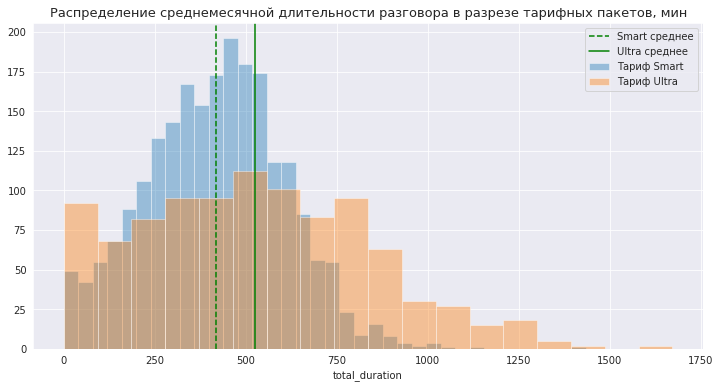

In [48]:
histogram_builder('total_duration', 'Распределение среднемесячной длительности разговора в разрезе тарифных пакетов, мин')

It should be noted at first glance that the amount of minutes consumed by users in the Ultra tariff is fully within the limit included in the package (3000 minutes). In the Smart tariff, on the other hand, a large number of users are significantly short of the 500 minutes included in the package, with 34% of users using minutes in excess of the package.

In [49]:
print('Доля пользователей, использующих минуты сверх включенных в пакет "Смарт":', round(len(user_cons.query('tariff == "smart" and total_duration>500'))/len(user_cons.query('tariff == "smart"')), 2))

Доля пользователей, использующих минуты сверх включенных в пакет "Смарт": 0.34


### Number of messages analysis

Let's analyze the average monthly number of messages per user in terms of tariff plans. To do this, will group our dataset by tariff and calculate the average, variance and standard deviation.

In [50]:
user_cons.groupby('tariff').agg({'total_messages':['mean', 'var', 'std']}).style.format('{:.0f}')

For the sake of clarity, let's visualise our findings on a histogram.

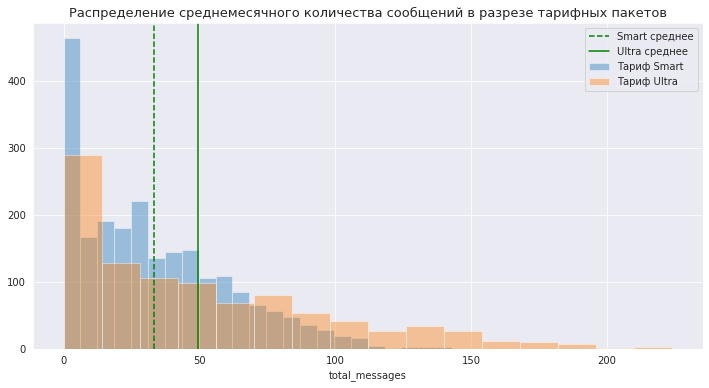

In [51]:
histogram_builder('total_messages', 'Распределение среднемесячного количества сообщений в разрезе тарифных пакетов')

It should be noted at once that the number of messages sent by users in the Ultra tariff is entirely within the limit included in the package (1,000 messages). In the Smart tariff, on the other hand, the distribution shows a certain lack of 50 messages included in the package, with 25% of users using messages in excess of the package.

In [52]:
print('Доля пользователей, использующих сообщения сверх включенных в пакет "Смарт":', round(len(user_cons.query('tariff == "smart" and total_messages>50'))/len(user_cons.query('tariff == "smart"')), 2))

Доля пользователей, использующих сообщения сверх включенных в пакет "Смарт": 0.25


### Internet trafic analysis

Let's analyse the average monthly Internet traffic consumed by one user in terms of tariff plans. To do this we will group our dataset by tariff and calculate the average, variance and standard deviation.

In [53]:
user_cons.groupby('tariff').agg({'total_internet':['mean', 'var', 'std']}).style.format('{:.0f}')

It is immediately apparent that even the average Internet traffic consumed by the user per month in the Smart tariff is higher than the limit included in the package (15 GB). On the contrary, in the Ultra tariff we see the unused traffic (30 GB included in the package).

For the sake of clarity, let's visualise our findings on a histogram.

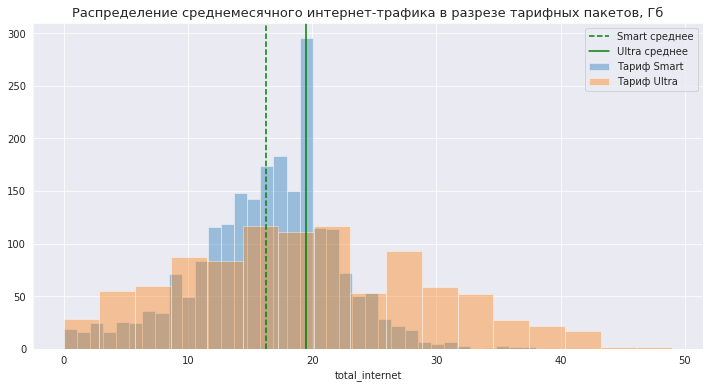

In [54]:
histogram_builder('total_internet', 'Распределение среднемесячного интернет-трафика в разрезе тарифных пакетов, Гб')

With the use of internet traffic in the Ultra package the picture is different from the use of minutes and messages. Although most users fit within the limit, nevertheless 14% of users are short of the included traffic volume.

In the Smart package the distribution shows an acute shortage of included traffic. The average consumption is higher than the 15GB included in the package, and the mode of this distribution is generally around 19GB. 59% of the users of this tariff use more traffic than is included in the package.

In [55]:
print('Доля пользователей, использующих трафик сверх включенного в пакет "Смарт":', round(len(user_cons.query('tariff == "smart" and total_internet>15'))/len(user_cons.query('tariff == "smart"')), 2))
print('Доля пользователей, использующих трафик сверх включенного в пакет "Ультра":', round(len(user_cons.query('tariff == "ultra" and total_internet>30'))/len(user_cons.query('tariff == "ultra"')), 2))

Доля пользователей, использующих трафик сверх включенного в пакет "Смарт": 0.59
Доля пользователей, использующих трафик сверх включенного в пакет "Ультра": 0.14


### Revenue analysis

Let's analyse the average monthly payment paid by the user for the services consumed in terms of tariff plans. To do this, we group our dataset by tariff and calculate the average monthly payment and the total annual revenue received by the operator. 

In [56]:
user_cons.groupby('tariff').agg({'total_revenue':['mean', 'sum', 'count']}).style.format('{:.2f}')

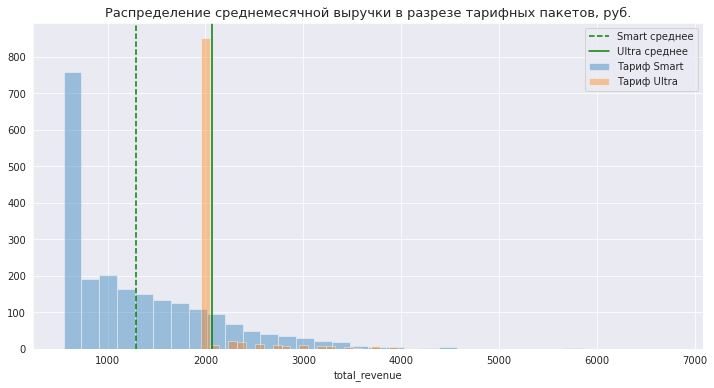

In [57]:
histogram_builder('total_revenue', 'Распределение среднемесячной выручки в разрезе тарифных пакетов, руб.')

The histogram demonstrates very clearly that the vast majority of Ultra users are fully sufficient in terms of the services included in the package. We see a peak around the cost of the package (RUB 1,950), indicating that the majority of users of this package pay only the subscription fee. Only 14% of users pay for services consumed in excess of those included in the package.

At the same time, the situation with users of the Smart package is quite different. We see a peak around the value of the monthly subscription fee (RUB 550). However, the majority of users, comprising 75% (see calculation below) of users of this tariff package consume and pay for services in addition to those included in the package. 

We can see that the average monthly fee is 2.35 times higher than the price of the tariff package: 1289.97/550=2.35 

Overall for the year, the operator's revenue from the Smart tariff is higher than the total revenue from the Ultra tariff (2,875,351 RUB vs. 2,039,100 RUB). This is due to the larger number of Smart tariff users. But at the same time average annual revenue per customer in "Ultra" tariff is higher than in "Smart" tariff (13,685.23 RUB vs. 8,191.88 RUB). The calculations are presented below.

In [58]:
print('Доля пользователей, оплачивающих услуги сверх тарифного пакета "Смарт":', round(len(user_cons.query('tariff == "smart" and extra_package_revenue>0'))/len(user_cons.query('tariff == "smart"')), 2))
print('Доля пользователей, оплачивающих услуги сверх тарифного пакета "Ультра":', round(len(user_cons.query('tariff == "ultra" and extra_package_revenue>0'))/len(user_cons.query('tariff == "ultra"')), 2))

Доля пользователей, оплачивающих услуги сверх тарифного пакета "Смарт": 0.75
Доля пользователей, оплачивающих услуги сверх тарифного пакета "Ультра": 0.14


In [59]:
print('Выручка с одного клиента тарифа Smart составляет:', round(user_cons.query('tariff == "smart"').total_revenue.sum() / users.query('tariff == "smart"').user_id.count(), 2))
print('Выручка с одного клиента тарифа Ultra составляет:', round(user_cons.query('tariff == "ultra"').total_revenue.sum() / users.query('tariff == "ultra"').user_id.count(), 2))


Выручка с одного клиента тарифа Smart составляет: 8191.88
Выручка с одного клиента тарифа Ultra составляет: 13685.23


** Conclusion:**

The analysis of customer behaviour shows that the 'Ultra' package more than covers customers' needs in terms of services consumed, especially in terms of calls and messages the balance of unused services is very significant. The share of customers of this tariff package, who pay for services **exceeding those included in the package is only 14%.** These are customers who lack the Internet traffic included in the package.

The situation is completely different with the 'Smart' package users. **75% of users of this package pay for services in excess of those included in the package.** And the extra charge for services consumed in excess of the package exceeds the cost of the monthly fee for the tariff package by 2.35 times. With the package price being 550 rubles, the average monthly fee of a user for a Smart tariff plan is 1,289.97 rubles. 

Although the operator's total annual revenue from "Smart" tariff plan is higher (due to a greater number of users of this tariff), the average annual revenue per customer is higher in Ultra tariff (Smart: RUB 8191.88, Ultra: RUB 13685.23). 

The Smart tariff package is targeted at the mass retail customer segment, while the Ultra package is targeted at the high-margin but narrower business segment. It's classic marketing - all customers are important, so **a separate business product is developed for each customer segment.**

## Hypothesis testing

### Users' average revenue of Ultra and Smart tariff differ

Let us test the hypotheses about the equality of the two General Sets. To do this, we first identify two samples with a compared indicator of average revenue, in terms of their respective tariffs.

In [60]:
# sampling for the Smart tariff

smart_revenue = user_cons.query('tariff=="smart"').total_revenue

# sampling for the Ultra tariff

ultra_revenue = user_cons.query('tariff=="ultra"').total_revenue

We need to test the hypothesis that the average revenue of Ultra and Smart users is different. When testing this hypothesis it should be taken into account that the samples we have taken are independent of each other. Therefore, we will use `ttest_ind()` to test the hypotheses.

In addition, the above analysis of client behaviour and the calculated variance values in terms of tariff packages, which are different for each tariff, suggest that when applying the test, the variance difference will need to be specified in the `equal_var = False` parameter of the `ttest_ind()` method.

Let us formulate the null hypothesis and the alternative hypothesis, given that the null hypothesis always implies equality of the compared indicators, and the alternative hypothesis, respectively, complete or one-sided inequality:
- H0: "The average revenue of Ultra tariff users is equal to the average revenue of Smart tariff users".
- H1: "The average revenue of Ultra users is NOT equal to the average revenue of Smart users".

Will assume a critical level of statistical significance `alpha = 0.05`. If `p-value` is less than this, we reject our null hypothesis.

In [61]:
alpha = 0.05

results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 4.2606313931076085e-250
Отвергаем нулевую гипотезу


The result of the hypothesis test shows that our null hypothesis is rejected. 

In other words, **the average revenue of Ultra users is statistically significantly different from the average revenue of Smart users.**

### The average revenue of users from Moscow differs from users from other regions

Let us test the hypotheses of equality between the two General Sets. To do this, we first select two samples with a comparable average revenue figure, broken down by the respective regions: Moscow and the rest of the regions.

In [61]:
user_cons.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [62]:
moscow = user_cons.query('city == "Москва"').total_revenue
not_moscow = user_cons.query('city != "Москва"').total_revenue

We need to test the hypothesis that the average revenue of users in Moscow is different from the average revenue of users in other regions. When testing this hypothesis, we should take into account that our samples are independent of each other. Therefore, we will use `ttest_ind()` to test the hypotheses.

In addition, there is reason to believe that the client behaviour of users in Moscow differs from the client behaviour of users in the regions, due to the differences in the ability to pay. Accordingly, we expect a different variance in each sample. This variance shall be specified in the `equal_var = False` parameter of method `ttest_ind()` as in the previous hypothesis test.

Will formulate the null and alternative hypotheses, given that the null hypothesis always implies equality of the compared indicators, and the alternative hypothesis, respectively, a complete, or one-sided inequality:
- H0: "The average revenue of users from Moscow is equal to the average revenue of users from other regions".
- H1: "The average revenue of users from Moscow is NOT equal to the average revenue of users from other regions".

Will assume a critical level of statistical significance `alpha = 0.05`. If `p-value` is less than it - reject our null hypothesis.

In [63]:
alpha = 0.05

results = st.ttest_ind(moscow, not_moscow, equal_var = False)

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


The result of the hypothesis test shows that we were unable to disprove our null hypothesis.

In other words, **the average revenue of users from Moscow is not statistically significantly different from the average revenue of users from other regions.** That is, there is no statistically significant difference between the samples.

## Overall conclusion

In the study we analysed tariff packages on a small sample of 500 customers. We analysed the behavioural characteristics of users depending on the selected tariff plan - the duration of calls, the number of messages and the volume of internet traffic consumed. We also assessed the operator's revenues in terms of each tariff package.

**Conclusion: user behaviour and revenue**. 

    Tariff "Ultra" - the share of users who pay for services beyond those included in the tariff plan: 14%
    Tariff "Smart" - share of users paying more than the services included in the tariff plan: 75%.
    Ultra tariff - average monthly fee for the tariff plan usage: 2070 RUB (at tariff = 1950 RUB/month)
    Tariff "Smart" - average monthly fee for using the Tariff Plan: 1289.97 RUB (tariff = 550 RUB/month)
    Tariff "Ultra" - total annual revenue from tariff "Ultra": 2,039,100 RUB.
    Tariff Smart - total annual revenue from Smart tariff: 2,875,351 RUB.
    Tariff "Ultra" - annual average revenue per customer in "Ultra" tariff: RUB 13,685.23
    Tariff "Smart" - annual average revenue per customer in "Smart" tariff: 8,191.88 RUB.
   
---
Ultra" package almost completely covers the needs of customers in consumed services, especially in terms of calls and messages the balance of unclaimed services is very significant. The share of customers in this tariff package who pay for services beyond those included in the package is only 14%. These are customers who buy additional Internet traffic.

The situation with Smart tariff package users is completely different. 75% of users of this package pay for services in excess of those included in the package. Moreover, the extra charge for services consumed in excess of the package exceeds the cost of the monthly fee for the tariff package by 2.35 times. The average monthly fee for a Smart tariff plan user is RUB 1,289.97 for a package cost of RUB 550.

We can assume that there is great potential for revenue growth among Smart tariff customers, especially those who on average pay more than the average fee of 1,289.97 rubles. The percentage of Smart subscribers who exceed the average monthly fee (more than RUB 1,289.97) is 40.7% of all Smart subscribers. 

Cumulative annual revenues from Smart tariff are higher than total revenues from Ultra tariff (RUB 2,875,351 vs. RUB 2,039,100). This can be explained by the much higher number of Smart users. 
However, per customer, average annual revenue per customer in Ultra tariff is higher than per customer in Smart tariff (RUB 13,685.23 vs. RUB 8,191.88). 

In support of our analytical calculations, we have also confirmed the differences in the average revenue per Smart and Ultra tariff customer by conducting a statistical test.

---
**<u>Recommendation to the Commercial Department, which is the contracting party for the study:<u/>** 

The significant number of customers of the Smart tariff package who regularly pay above the average monthly fee (RUB 1,289.97) represents a significant potential for revenue growth. The share of such customers is almost 41%. 

We recommend reallocating the advertising budget to this target audience and directing advertising activity and marketing efforts to encourage this target segment to switch to the more expensive, but higher volume of included services, tariff "Ultra". In addition, the average annual revenue per customer for the Ultra package is higher.

In response to Commercial Department's question as to which tariff is better, it should be noted that both packages need to be developed as they are business products targeting different target segments. "Smart" is targeted at the mass retail segment, while "Ultra" is focused on the high-income but narrower business segment. 

Also, we would like to point out that we tested and confirmed the hypothesis that **the average revenue of users from Moscow does not differ from average revenue of users in other regions.** Thus, when developing a marketing strategy and promoting products, **we should not make regional differences and adapt rate plans depending on the ability to pay in individual regions.    
    

--- 
**>>> Bug Report:**
    
I would like to thank the data engineers for the quality and correctness of the data. The data was pleasant, easy and most importantly efficient to work with. This allowed us to save a lot of time for preprocessing the data and pay more attention to detailed analysis. Nothing to report in the bug report today :)
